# PCA from scratch using the numpy library

PCA is useful as a generic dimensionality reduction technique and can be applied to both supervised and unsupervised data, although most often used for the latter.

Other methods include LDA (Linear Discriminant Analysis), which is used for supervised learning on labelled datasets. The main difference is the computation of the mean vectors for each of the classes instead of dimensions for PCA.

Reasons for dimensionality reduction:

  1) Space efficiency
  
  2) Computing efficiency - speed and resources
  
  3) Visualisation - impossible to visualise 100 dimensions (features).
      Want to analyse by human eye.
      
Importantly, dimensionality reduction is an important step in organising data for future analysis. It can be used in a Machine Learning workflow to speed up training as the process of reduction compresses the data.

In [95]:
import numpy as np #math
np.random.seed(1) # used for debugging - randomly generated numbers will always be the same

Step 1 - Create Dataset

1) Create sample mean and sample covariance.

2) Create a normal distribution using the mean (centre) and covariance (width or standard deviation) as variables, creating a 3x20 matrix (3D matrix).

3) Transpose Data. numpy.ndarray.T will transpose the data (columns become rows and vice versa)

Covariance is a mesure of how changes in one variable are associated in changes in a second variable.

In [96]:
mu_vec1 = np.array([0,0,0])                         # sample mean
cov_mat1 = np.array([[1,0,0], [0,1,0], [0,0,1]])    # sample covariance

class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
print(class1_sample)

[[ 1.62434536 -1.07296862  1.74481176 -0.24937038 -0.3224172  -1.09989127
   0.04221375  1.14472371  0.90085595 -0.93576943 -0.69166075 -0.84520564
  -1.11731035  0.74204416 -0.74715829 -0.63699565  0.12015895 -0.35224985
  -0.20889423  0.93110208]
 [-0.61175641  0.86540763 -0.7612069   1.46210794 -0.38405435 -0.17242821
   0.58281521  0.90159072 -0.68372786 -0.26788808 -0.39675353 -0.67124613
   0.2344157  -0.19183555  1.6924546   0.19091548  0.61720311 -1.1425182
   0.58662319  0.28558733]
 [-0.52817175 -2.3015387   0.3190391  -2.06014071  1.13376944 -0.87785842
  -1.10061918  0.50249434 -0.12289023  0.53035547 -0.6871727  -0.0126646
   1.65980218 -0.88762896  0.05080775  2.10025514  0.30017032 -0.34934272
   0.83898341  0.88514116]]


Create Second Dataset using the same method as class 1

In [97]:
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0], [0,1,0], [0,0,1]])

class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T

print(class2_sample)

[[ 0.24560206  0.70190716  2.13162939 -0.39649634  1.16003707 -1.02220122
   1.23009474  0.79924193  1.19829972  1.37756379  2.19891788  0.36126959
   0.65614632  1.69803203  1.40349164  1.16938243  0.73378149  1.31515939
   1.35054598 -0.61577235]
 [ 2.25286816  1.48851815  2.51981682 -0.44411381  1.87616892  0.69379599
   1.76201118  1.18656139  1.11900865  1.12182127  1.18515642  1.42349435
   1.04359686  0.55287144  1.59357852  1.74055645  1.03261455  1.84616065
  -0.31228341  2.12141771]
 [ 1.51292982  0.92442829  3.18557541  0.49553414  1.31563495  1.82797464
   0.77767186  1.41005165  0.32933771  2.12948391  0.62471505  1.07734007
   0.37999916  2.2245077  -0.09491185  0.0462994  -0.37311732  0.14048406
   0.96130449  1.40890054]]


Step 2 - plot the  sample data. Create a 3d subplot within the figure. There are twenty entries per class. Confirms data is valid

Populating the interactive namespace from numpy and matplotlib


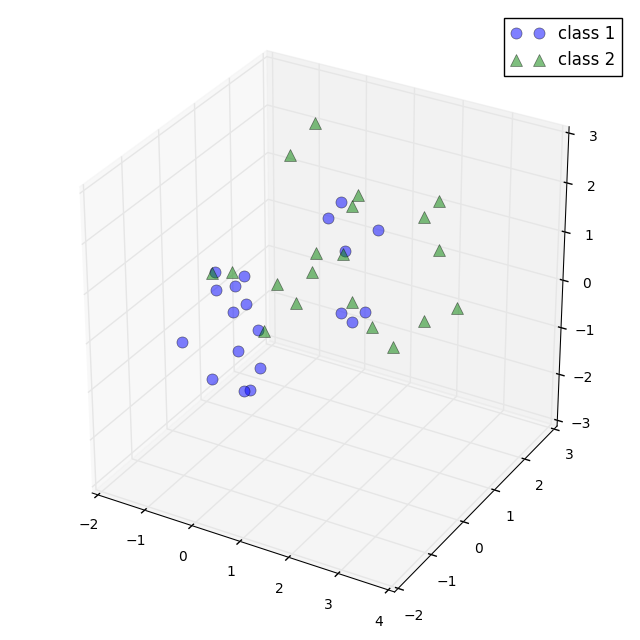

In [37]:
%pylab inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))

ax = plt.axes(projection="3d")

#plot samples
ax.plot(class1_sample[0], class1_sample[1], class1_sample[2], "o", markersize=8, color="blue", alpha=0.5, label="class 1")
ax.plot(class2_sample[0], class2_sample[1], class2_sample[2], "^", markersize=8, color="green", alpha=0.5, label="class 2")

ax.legend(loc="upper right")

plt.show()

In [98]:
# Merge data into one big dataset
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)

# Transposed for easier visualisation of the columns
print(all_samples.T)

[[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069   0.3190391 ]
 [-0.24937038  1.46210794 -2.06014071]
 [-0.3224172  -0.38405435  1.13376944]
 [-1.09989127 -0.17242821 -0.87785842]
 [ 0.04221375  0.58281521 -1.10061918]
 [ 1.14472371  0.90159072  0.50249434]
 [ 0.90085595 -0.68372786 -0.12289023]
 [-0.93576943 -0.26788808  0.53035547]
 [-0.69166075 -0.39675353 -0.6871727 ]
 [-0.84520564 -0.67124613 -0.0126646 ]
 [-1.11731035  0.2344157   1.65980218]
 [ 0.74204416 -0.19183555 -0.88762896]
 [-0.74715829  1.6924546   0.05080775]
 [-0.63699565  0.19091548  2.10025514]
 [ 0.12015895  0.61720311  0.30017032]
 [-0.35224985 -1.1425182  -0.34934272]
 [-0.20889423  0.58662319  0.83898341]
 [ 0.93110208  0.28558733  0.88514116]
 [ 0.24560206  2.25286816  1.51292982]
 [ 0.70190716  1.48851815  0.92442829]
 [ 2.13162939  2.51981682  3.18557541]
 [-0.39649634 -0.44411381  0.49553414]
 [ 1.16003707  1.87616892  1.31563495]
 [-1.02220122  0.69379599

Step 4 - compute the mean vector, this will help compute the covariance matrix.

1) Calculate the average value for each dimension

2) Create a vector from the mean values of each dimension

Note, this step is not necessary when using the numpy.cov method, but is useful to illustrate the process underneath the numpy method

In [45]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

#3d mean vector
mean_vector = np.array([[mean_x], [mean_y], [mean_z]])

print(mean_vector)

[[ 0.56284783]
 [ 0.54751954]
 [ 0.43373732]]


Step 5 - Compute the Covariance matrix. This measures the relationship between the variables. 

1) 

In [49]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])

print(cov_mat)

[[ 1.35799707  0.28308013  0.30633034]
 [ 0.28308013  1.19352841  0.25942538]
 [ 0.30633034  0.25942538  1.10295429]]


Step 6 - Compute the eigenvector and eigenvalues

--> Eigenvectors detail the axes along which a transformation acts by stretch or compressing. 

--> Eigenvalues details the variance in the data along the eigenvector.

The eignevector with the highest eigenvalue is the Principal Component but there will be as many eigenvectors as there are dimensions in the data. The new principal components give us a new frame in which to visualise the data in relation to itself. By choosing the eigenvectors with the greatest variance - the principal componenents - it is possible to visualise N-dimensional data more easily in fewer dimensions.

Links:

1) https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/

2) http://setosa.io/ev/eigenvectors-and-eigenvalues/

In [55]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

print ("values\n", eig_val)
print ("vectors\n", eig_vec)

values
 [ 1.80086427  0.98453677  0.86907873]
vectors
 [[ 0.68466588  0.67192703 -0.28239457]
 [ 0.5319545  -0.72553432 -0.4366055 ]
 [ 0.49825399 -0.14870782  0.8541832 ]]


Step 7 - Create eigenpair from both and sort them.

Use numpy.abs to make eigenvalue value positive - only magnitude, not sign, matters

In [83]:
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

#sort the tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

#print(eig_pairs)

#confirm the list is correctly sorted from high to low (only shows the eigenvalue of tuple)
num = 1
for i in eig_pairs:
    print(num)
    print("Eigenvalue", i[0])
    print("Eigenvector", i[1])
    num += 1

1
Eigenvalue 1.80086426667
Eigenvector [ 0.68466588  0.5319545   0.49825399]
2
Eigenvalue 0.984536770096
Eigenvector [ 0.67192703 -0.72553432 -0.14870782]
3
Eigenvalue 0.869078734289
Eigenvector [-0.28239457 -0.4366055   0.8541832 ]


Step 8 - choose the k eigenvector

1) Stack arrays in sequence horizontally using the hstack method

In [67]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3, 1), eig_pairs[1][1].reshape(3,1)))

print(matrix_w)

[[ 0.68466588  0.67192703]
 [ 0.5319545  -0.72553432]
 [ 0.49825399 -0.14870782]]


Step 9 - Bring it all together by transforming data using Eigenpair matrix.

1) Transpose the eigenpair matrix

2) Compute the dot product between original dataset and eigenpair matrix to reduce data down to two features.

3) Plot transformed data as 2d scatter plot

In [84]:
transformed = matrix_w.T.dot(all_samples)

print(transformed)

[[-0.62248961  1.53418576  2.24510902 -0.37086564 -0.83043771 -1.40063063
  -1.62453346 -0.53150226 -0.35753134  0.018683    1.34905711 -0.80582733
  -0.16705438  1.25669164  1.50593816  0.88179671  1.99313164 -0.4951571
  -0.06548864 -1.0127642   2.13213895  1.09953604 -0.41855982  0.99084564
   2.95739425  2.50563509  2.37807726  2.07629122  3.1234713   0.95447057
   1.33274433  1.55358863  1.81661653  0.18425131  3.30669015  3.15201903
   1.56995495  1.39536493  0.81776747  0.28057287]
 [ 1.26930265 -0.69477061 -0.58655605 -0.63440851 -0.37181631 -0.60782568
  -0.47575931  0.66184268 -0.22751649  0.41373013  0.97001946 -1.17245887
  -0.97484963 -0.22266075 -1.33471361 -0.37867121 -0.83576644 -0.41601184
  -0.01162535  1.00591692 -2.20255946 -0.54370612 -0.60357764 -0.31266866
  -0.78699147  1.70006444  0.14059609 -1.62162801  1.88835542  1.38840139
   0.2711279  -1.84186141  1.67201006  1.13600055 -0.85744745  0.5734575
  -0.4152417   0.14470831  0.91667331  0.63681859]]


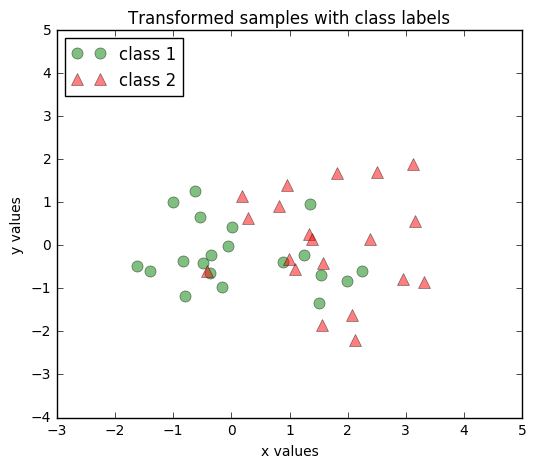

In [93]:
plt.figure(figsize=(6,5))

transclass1_x = transformed[0, 0:20]
transclass1_y = transformed[1, 0:20]

transclass2_x = transformed[0, 20:40]
transclass2_y = transformed[1, 20:40]

plt.plot(transclass1_x, transclass1_y, "o", markersize = 8, color="green", alpha=0.5, label="class 1")
plt.plot(transclass2_x, transclass2_y, "^", markersize = 8, color="red", alpha=0.5, label="class 2")

plt.xlim((-3, 5))
plt.ylim((-4, 5))
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend(loc="upper left")
plt.title("Transformed samples with class labels")